In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  Malaria Classification with CNN and Transfer Learning

## Introduction

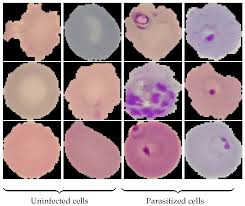

## Project Overview

This project focuses on the application of Convolutional Neural Networks (CNN) and Transfer Learning techniques to classify malaria from cell images. In this project, we develop a CNN model by using Transfer Learning to leverage knowledge from pre-trained networks with a dataset specifically compiled for malaria-infected and uninfected blood smear images. The objective is to accurately distinguish between infected and uninfected cells, thereby assisting in rapid and efficient malaria diagnosis.

## Objective

Develop a CNN model using Transfer Learning to leverage knowledge from pre-trained networks for malaria classification.

## Import Libraries

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
plt.style.use("ggplot")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Reshape, InputLayer

import warnings 
warnings.filterwarnings("ignore")

2024-05-12 15:52:50.343998: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 15:52:50.344097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 15:52:50.493215: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## EDA

In [2]:
labels = ["Parasitized", "Uninfected"]
img_path = "../input/cell-images-for-detecting-malaria/cell_images/"

In [3]:
img_list = []
label_list = []

for label in labels:
    for img in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img)
        label_list.append(label)
        

In [4]:
img_list[:5]

['../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_93.png',
 '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C99P60ThinF_IMG_20150918_141001_cell_133.png',
 '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C101P62ThinF_IMG_20150918_151942_cell_60.png',
 '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C162P123ThinF_IMG_20151116_102655_cell_163.png',
 '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C52P13thinF_IMG_20150725_124830_cell_174.png']

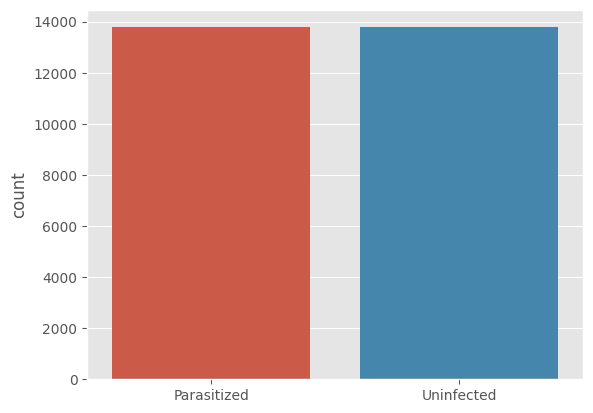

In [5]:
sns.countplot(x=label_list);

In [4]:
df = pd.DataFrame({"image":img_list, "label":label_list})
df.sample(13)

,image,label
17336,../input/cell-images-for-detecting-malaria/cel...,Uninfected
26260,../input/cell-images-for-detecting-malaria/cel...,Uninfected
21132,../input/cell-images-for-detecting-malaria/cel...,Uninfected
24154,../input/cell-images-for-detecting-malaria/cel...,Uninfected
9168,../input/cell-images-for-detecting-malaria/cel...,Parasitized
13843,../input/cell-images-for-detecting-malaria/cel...,Uninfected
6098,../input/cell-images-for-detecting-malaria/cel...,Parasitized
19950,../input/cell-images-for-detecting-malaria/cel...,Uninfected
13538,../input/cell-images-for-detecting-malaria/cel...,Parasitized
23190,../input/cell-images-for-detecting-malaria/cel...,Uninfected


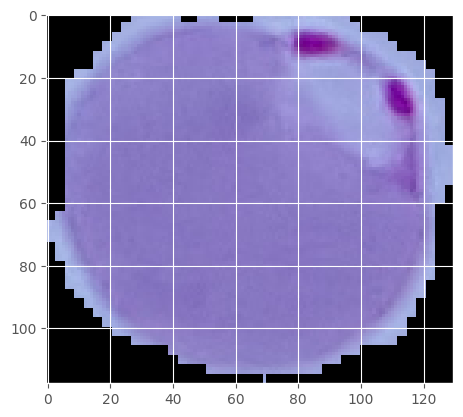

In [7]:
img = cv2.imread(df.image[399])
plt.imshow(img);

In [8]:
img.shape

(118, 130, 3)

In [5]:
d = {"Parasitized":0, "Uninfected":1}
df["encoded_label"] = df.label.map(d)
df.sample(5)

,image,label,encoded_label
5300,../input/cell-images-for-detecting-malaria/cel...,Parasitized,0
21149,../input/cell-images-for-detecting-malaria/cel...,Uninfected,1
9586,../input/cell-images-for-detecting-malaria/cel...,Parasitized,0
13265,../input/cell-images-for-detecting-malaria/cel...,Parasitized,0
1222,../input/cell-images-for-detecting-malaria/cel...,Parasitized,0


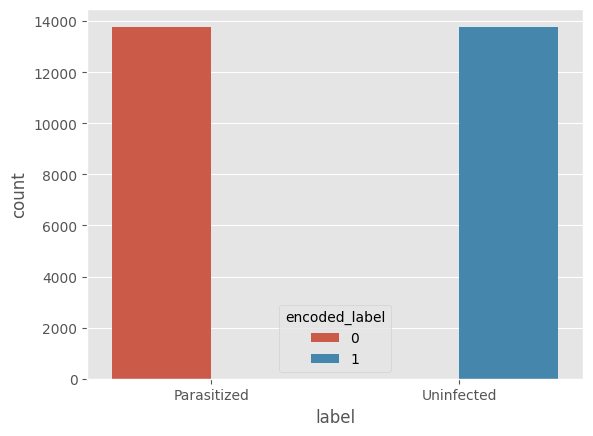

In [6]:
sns.countplot(x="label", hue="encoded_label", data=df);

## Data Preprocessing

In [7]:
X = []
y = []

for index, row in df.iterrows():
    img_path = row["image"]
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image at {img_path}")
        continue
    img = cv2.resize(img, (50, 50))
    img = img / 255.0
    X.append(img)
    # Append only the label associated with the current row
    y.append(row["encoded_label"])



Failed to load image at ../input/cell-images-for-detecting-malaria/cell_images/Parasitized/Thumbs.db
Failed to load image at ../input/cell-images-for-detecting-malaria/cell_images/Uninfected/Thumbs.db


In [8]:
X = np.array(X)
y = np.array(y)

In [13]:

np.save('X.npy', X)  # Saves the array to a file with .npy extension
np.save('y.npy', y)


In [ ]:

X = np.load('X.npy')  # Loads the array from the file
y = np.load('y.npy')


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")  


X_train shape: (22046, 50, 50, 3)
X_test shape: (5512, 50, 50, 3)
y_train shape: (22046,)
y_test shape: (5512,)


## Modelling

In [45]:
model = Sequential()

model.add(InputLayer(input_shape=(50, 50, 3)))

model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])



In [46]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 137s 190ms/step - accuracy: 0.6941 - loss: 0.5801 - val_accuracy: 0.8917 - val_loss: 0.3265
Epoch 2/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 141s 189ms/step - accuracy: 0.9327 - loss: 0.1978 - val_accuracy: 0.9572 - val_loss: 0.1355
Epoch 3/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 143s 191ms/step - accuracy: 0.9494 - loss: 0.1542 - val_accuracy: 0.9530 - val_loss: 0.1469
Epoch 4/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 141s 190ms/step - accuracy: 0.9455 - loss: 0.1538 - val_accuracy: 0.9476 - val_loss: 0.1403
Epoch 5/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9516 - loss: 0.1426 - val_accuracy: 0.9487 - val_loss: 0.1452
Epoch 6/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 130s 188ms/step - accuracy: 0.9531 - loss: 0.1387 - val_accuracy: 0.9559 - val_loss: 0.1363
Epoch 7/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 141s 187ms/step - accuracy: 0.9602 - loss: 0.1215 - val_accuracy: 0.9490 - val_loss: 0.1555
Epoch 8/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 144s 191ms/step - accuracy: 0.9580 -

In [47]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f}, Accuracy: {accuracy*100:.2f}%")

173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9447 - loss: 0.1687
Loss: 0.165, Accuracy: 94.47%


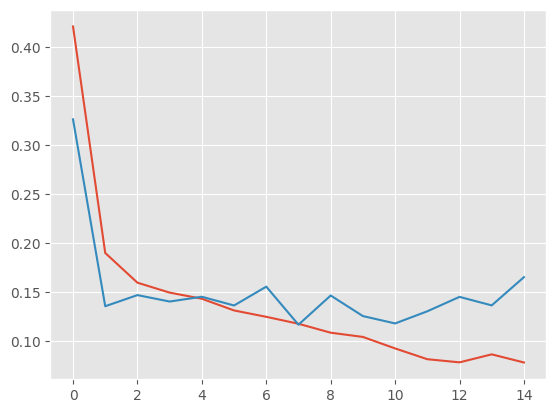

In [48]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss");

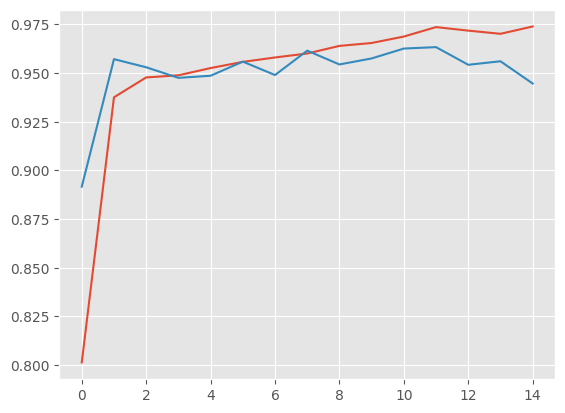

In [49]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy");

In [74]:
model.save("model_malaria_detection.h5")

In [16]:
model = load_model("/kaggle/input/malaria-detection-model/model_malaria_detection.h5")

## Prediction

In [57]:
pred = model.predict(X_test)
pred

173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step


array([[2.0299156e-03],
       [2.9829310e-03],
       [9.7879493e-01],
       ...,
       [1.2130993e-02],
       [5.5023207e-04],
       [2.9073737e-04]], dtype=float32)

In [66]:
pred = np.round(pred)
pred = pred.flatten()
pred

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [68]:
df_pred = pd.DataFrame({"Actual":y_test, "Predicted":pred})
df_pred["Result"] = df_pred["Predicted"].replace({0:"Parasitized", 1:"Uninfected"})
df_pred["Predicted"] = df_pred["Predicted"].astype("int")
df_pred.sample(30)

,Actual,Predicted,Result
4472,1,1,Uninfected
2764,1,1,Uninfected
4200,1,1,Uninfected
1650,1,1,Uninfected
337,0,0,Parasitized
2982,1,1,Uninfected
361,1,1,Uninfected
1602,0,0,Parasitized
2054,0,0,Parasitized
4449,1,1,Uninfected


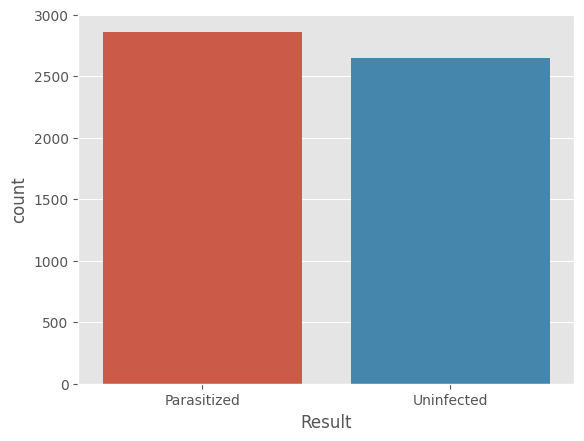

In [72]:
sns.countplot(x=df_pred["Result"]);

## Confusion Matrix

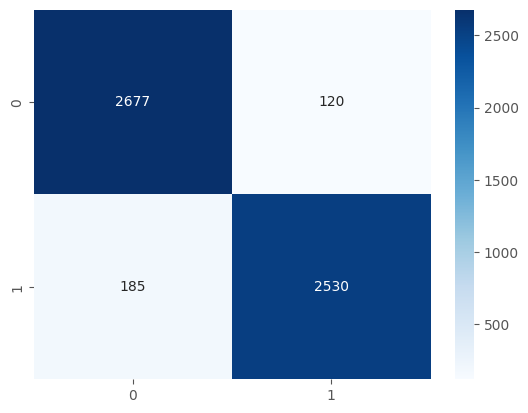

In [73]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues");

## Classification Report

In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2797
           1       0.95      0.93      0.94      2715

    accuracy                           0.94      5512
   macro avg       0.95      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



With an overall accuracy of 94%, the model performs excellently on the test dataset. This high accuracy indicates that the model is effective at distinguishing between the two classes "Parasitized" and "Uninfected" given the dataset.
But I want to use transfer learning to improve the accuracy of the model.

## Transfer Learning

In [27]:
from tensorflow.keras.applications import VGG19, EfficientNetV2L


## VGG19

  I will firstly use VGG19 as the base model. Because VGG19 is a pre-trained model that has largest and 143.7M parameters.

In [18]:
base_model = VGG19(weights="imagenet", include_top=False, input_tensor=None, input_shape=None)

model = Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False # freeze all the base model layers
    
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 407s 588ms/step - accuracy: 0.8406 - loss: 0.3559 - val_accuracy: 0.8933 - val_loss: 0.2591
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 440s 585ms/step - accuracy: 0.8920 - loss: 0.2567 - val_accuracy: 0.8908 - val_loss: 0.2587
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 437s 578ms/step - accuracy: 0.8959 - loss: 0.2480 - val_accuracy: 0.8804 - val_loss: 0.3001
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 444s 581ms/step - accuracy: 0.9098 - loss: 0.2226 - val_accuracy: 0.9031 - val_loss: 0.2298
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 442s 582ms/step - accuracy: 0.9049 - loss: 0.2245 - val_accuracy: 0.9086 - val_loss: 0.2235
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 438s 577ms/step - accuracy: 0.9169 - loss: 0.2077 - val_accuracy: 0.9098 - val_loss: 0.2230
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 440s 574ms/step - accuracy: 0.9167 - loss: 0.2051 - val_accuracy: 0.9126 - val_loss: 0.2164
Epoch 8/10
689/689 ━━━━━━

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f}, Accuracy: {accuracy*100:.2f}%")

173/173 ━━━━━━━━━━━━━━━━━━━━ 83s 479ms/step - accuracy: 0.9048 - loss: 0.2354
Loss: 0.229, Accuracy: 90.77%


In [19]:
pred = model.predict(X_test)
pred

173/173 ━━━━━━━━━━━━━━━━━━━━ 83s 479ms/step


array([[9.6223965e-02],
       [9.9721365e-04],
       [9.9763054e-01],
       ...,
       [7.0342710e-03],
       [4.4600981e-01],
       [1.1942356e-03]], dtype=float32)

In [22]:
pred = np.round(pred)
pred = pred.flatten()

In [23]:

df_pred = pd.DataFrame({"Actual":y_test, "Predicted":pred})
df_pred["Result"] = df_pred["Predicted"].replace({0:"Parasitized", 1:"Uninfected"})
df_pred["Predicted"] = df_pred["Predicted"].astype("int")
df_pred.sample(30)

,Actual,Predicted,Result
4955,0,0,Parasitized
1464,0,0,Parasitized
2434,0,0,Parasitized
534,1,1,Uninfected
867,1,1,Uninfected
1609,0,0,Parasitized
4790,0,0,Parasitized
3739,0,1,Uninfected
2352,1,1,Uninfected
3376,1,1,Uninfected


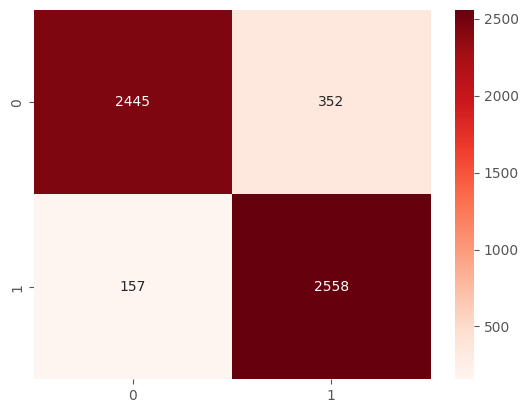

In [24]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Reds");

## Conclusion

### In conclusion, I developed and trained a Convolutional Neural Network (CNN) model to classify malaria from cell images into 2 distinct categories: "Parasitized" and "Uninfected". Our model achieved an impressive accuracy of 94%, indicating a high level of effectiveness in distinguishing between the two classes "Parasitized" and "Uninfected".
### In addition, I used transfer learning technique VGG19 to improve the accuracy of the model. But I did not find any significant improvement in the accuracy.
### The success of this CNN model in classifying malaria from cell images high accuracy holds significant implications for the field of healthcare. It is an important tool for diagnosing. This project exemplifies how machine learning and AI can be leveraged to solve practical problems in healthcare and beyond.